In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt

0.691085 0.13746999999999998 0.37116799999999994
0.6930890000000001 0.268196 -0.30510899999999985
0.82145 -0.03758 -0.04278399999999971
0.649034 -0.02132199999999998 0.00951600000000008
0.667884 -0.06464699999999998 -0.21303500000000009
0.591392 0.16883599999999999 -0.590598
0.696083 0.04316399999999998 0.1086640000000001
0.751275 0.01567200000000002 0.0365899999999999
0.712788 0.022396000000000027 -0.48240300000000014
-0.762159 -0.04953600000000001 0.0646580000000001
-0.47403999999999996 0.252242 -0.40689399999999987
-0.643078 0.236845 -0.47132499999999977
0.7482690000000001 0.27401700000000007 -0.5833200000000001
0.207126 0.288553 -0.4744170000000003
0.497367 0.272787 -0.6258140000000001
0.692611 -0.011747000000000007 -0.3178510000000001
0.726241 -0.005961999999999995 -0.198569
0.574582 0.169676 -0.6050370000000003


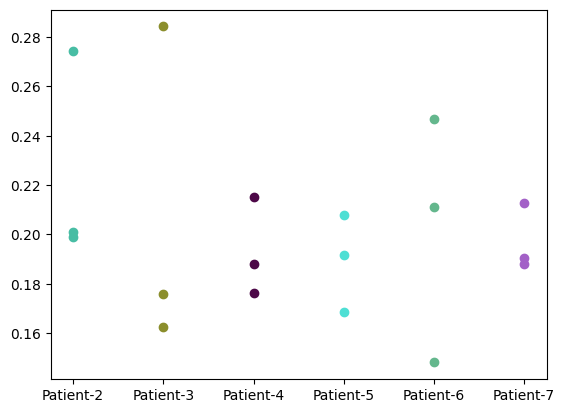

In [19]:
import random
import functions 

columns_of_interest = [
    'datetime',
    'Head.px',
    'Head.py',
    'Head.pz',
]

result = functions.get_movement_files('M000')
dataframes = functions.get_dataframe_from_file(result, columns_of_interest)

velocity = {}
for patient, movements in dataframes.items():
    if patient == "Patient-1":
        continue
    if patient not in velocity:
        velocity[patient] = []
    for movement in movements:
        df = movement
        #print(len(df))
        first_row = df.iloc[0]
        last_row = df.iloc[50]

        displacement_x = last_row['Head.px'] - first_row['Head.px']
        displacement_y = last_row['Head.py'] - first_row['Head.py']
        displacement_z = last_row['Head.pz'] - first_row['Head.pz']
        
        time_first = first_row['datetime'].split('_')[1].split('.')[0]
        time_end = last_row['datetime'].split('_')[1].split('.')[0]
        # calculate the time difference between the first and last row
        time_diff = pd.to_datetime(time_end) - pd.to_datetime(time_first)

        # time difference is in seconds 
        # displacement is in meters (?)
        velocity_x = displacement_x / time_diff.total_seconds()
        velocity_y = displacement_y / time_diff.total_seconds()
        velocity_z = displacement_z / time_diff.total_seconds()

        speed = math.sqrt(velocity_x**2 + velocity_y**2 + velocity_z**2)
        velocity[patient].append(speed)

# add to the same plot the values inside the velocity dictionary
for patient, values in velocity.items():
    # generate different colors for each patient
    color = (random.random(), random.random(), random.random())
    for value in values:
        plt.scatter(patient, value, color=color)
plt.show()
        